In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
import matplotlib.image as mpimg

In [5]:
# import the modules
import os
from os import listdir
 
def get_images(folder_dir):
    # get the path or directory
    images = []
    for images_path in os.listdir(folder_dir):

        # check if the image ends with png or jpg or jpeg
        if (images_path.endswith(".png") or images_path.endswith(".jpg")\
            or images_path.endswith(".jpeg")):
            # display
            #print(images_path)
            images.append(mpimg.imread(folder_dir+"/"+images_path))
    return images


In [6]:
## function: convert to grayscale image:
def gray_scale(images):
    gray_image = []
    for image in images:
        gray_image.append( cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    return gray_image

In [101]:
folder_dir = "../dataset/skin_cancer/test/benign"
benign_images = get_images(folder_dir)

In [102]:
benign_grays = gray_scale(benign_images)

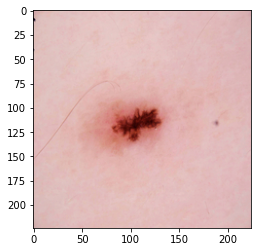

In [103]:
plt.imshow(benign_images[0])

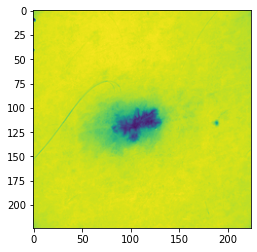

In [104]:
plt.imshow(benign_grays[0])
#df = pd.read_csv("../dataset/obesity.csv")

In [105]:
benign_grays[0].shape[0]

224

In [106]:
benign_grays[0].shape

(224, 224)

In [107]:
result = []
for each_gray in benign_grays:
    result.append(each_gray.ravel())
    

In [108]:
len(result), result[0].shape

(360, (50176,))

In [109]:
result

[array([152, 163, 163, ..., 187, 183, 182], dtype=uint8),
 array([224, 225, 224, ..., 207, 204, 201], dtype=uint8),
 array([173, 174, 175, ..., 157, 157, 159], dtype=uint8),
 array([171, 169, 172, ..., 181, 176, 179], dtype=uint8),
 array([179, 180, 182, ..., 174, 175, 174], dtype=uint8),
 array([157, 156, 154, ..., 165, 167, 168], dtype=uint8),
 array([147, 149, 152, ..., 139, 144, 140], dtype=uint8),
 array([162, 162, 163, ..., 194, 184, 176], dtype=uint8),
 array([131, 132, 132, ..., 148, 149, 151], dtype=uint8),
 array([174, 177, 175, ..., 168, 169, 169], dtype=uint8),
 array([170, 170, 169, ..., 173, 172, 169], dtype=uint8),
 array([165, 166, 165, ..., 170, 169, 168], dtype=uint8),
 array([157, 153, 151, ..., 139, 139, 135], dtype=uint8),
 array([170, 169, 164, ..., 174, 164, 165], dtype=uint8),
 array([151, 154, 153, ..., 105,  96,  89], dtype=uint8),
 array([169, 170, 169, ..., 161, 161, 163], dtype=uint8),
 array([146, 148, 152, ...,  82,  79,  78], dtype=uint8),
 array([160, 1

In [110]:
np.array(result).shape

(360, 50176)

In [111]:
df = pd.DataFrame(np.array(result))

In [112]:
df

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,152,163,163,166,168,169,171,172,174,174,...,192,192,191,190,188,190,187,187,183,182
1,224,225,224,228,224,226,227,226,224,228,...,209,209,212,210,209,209,211,207,204,201
2,173,174,175,175,172,173,170,168,172,172,...,154,153,159,157,152,156,159,157,157,159
3,171,169,172,171,172,173,172,172,171,172,...,184,185,181,181,180,180,180,181,176,179
4,179,180,182,183,183,183,185,184,185,184,...,179,178,178,176,176,180,177,174,175,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,188,188,186,184,185,185,185,183,186,187,...,173,173,173,176,176,172,172,169,176,175
356,145,141,139,142,143,143,137,126,127,131,...,161,162,161,161,162,162,162,163,166,166
357,121,120,122,122,119,116,117,118,117,120,...,116,116,116,113,115,112,112,108,109,110
358,186,186,187,187,184,184,183,182,185,187,...,178,180,180,177,180,184,184,181,176,177


In [113]:
target_benign_dumps = np.zeros(len(df[0]))

In [114]:
df_target_benign_dumps = pd.DataFrame(target_benign_dumps, columns = ['Target'])

In [115]:
new_df = pd.concat([df,df_target_benign_dumps], axis =1)

In [116]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,50167,50168,50169,50170,50171,50172,50173,50174,50175,Target
0,152,163,163,166,168,169,171,172,174,174,...,192,191,190,188,190,187,187,183,182,0.0
1,224,225,224,228,224,226,227,226,224,228,...,209,212,210,209,209,211,207,204,201,0.0
2,173,174,175,175,172,173,170,168,172,172,...,153,159,157,152,156,159,157,157,159,0.0
3,171,169,172,171,172,173,172,172,171,172,...,185,181,181,180,180,180,181,176,179,0.0
4,179,180,182,183,183,183,185,184,185,184,...,178,178,176,176,180,177,174,175,174,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,188,188,186,184,185,185,185,183,186,187,...,173,173,176,176,172,172,169,176,175,0.0
356,145,141,139,142,143,143,137,126,127,131,...,162,161,161,162,162,162,163,166,166,0.0
357,121,120,122,122,119,116,117,118,117,120,...,116,116,113,115,112,112,108,109,110,0.0
358,186,186,187,187,184,184,183,182,185,187,...,180,180,177,180,184,184,181,176,177,0.0


In [119]:
folder_dir = "../dataset/skin_cancer/test/malignant"
malignant_images = get_images(folder_dir)

In [120]:
malignant_grays = gray_scale(benign_images)

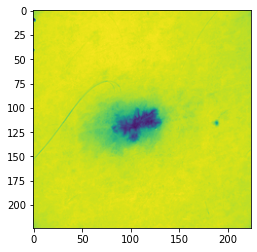

In [121]:
plt.imshow(malignant_grays[0])

In [122]:
result2 = []
for each_gray in malignant_grays:
    result2.append(each_gray.ravel())

In [123]:
df2 = pd.DataFrame(np.array(result2))

In [124]:
df2

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,152,163,163,166,168,169,171,172,174,174,...,192,192,191,190,188,190,187,187,183,182
1,224,225,224,228,224,226,227,226,224,228,...,209,209,212,210,209,209,211,207,204,201
2,173,174,175,175,172,173,170,168,172,172,...,154,153,159,157,152,156,159,157,157,159
3,171,169,172,171,172,173,172,172,171,172,...,184,185,181,181,180,180,180,181,176,179
4,179,180,182,183,183,183,185,184,185,184,...,179,178,178,176,176,180,177,174,175,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,188,188,186,184,185,185,185,183,186,187,...,173,173,173,176,176,172,172,169,176,175
356,145,141,139,142,143,143,137,126,127,131,...,161,162,161,161,162,162,162,163,166,166
357,121,120,122,122,119,116,117,118,117,120,...,116,116,116,113,115,112,112,108,109,110
358,186,186,187,187,184,184,183,182,185,187,...,178,180,180,177,180,184,184,181,176,177


In [125]:
target_malignant_dumps = target_benign_dumps +1

In [126]:
target_malignant_dumps

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [127]:
df_target_malignant_dumps = pd.DataFrame(target_malignant_dumps, columns = ['Target'])

In [128]:
new_df2 = pd.concat([df2,df_target_malignant_dumps], axis =1)

In [129]:
main_df = pd.concat([new_df, new_df2])

In [130]:
main_df

,0,1,2,3,4,5,6,7,8,9,...,50167,50168,50169,50170,50171,50172,50173,50174,50175,Target
0,152,163,163,166,168,169,171,172,174,174,...,192,191,190,188,190,187,187,183,182,0.0
1,224,225,224,228,224,226,227,226,224,228,...,209,212,210,209,209,211,207,204,201,0.0
2,173,174,175,175,172,173,170,168,172,172,...,153,159,157,152,156,159,157,157,159,0.0
3,171,169,172,171,172,173,172,172,171,172,...,185,181,181,180,180,180,181,176,179,0.0
4,179,180,182,183,183,183,185,184,185,184,...,178,178,176,176,180,177,174,175,174,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,188,188,186,184,185,185,185,183,186,187,...,173,173,176,176,172,172,169,176,175,1.0
356,145,141,139,142,143,143,137,126,127,131,...,162,161,161,162,162,162,163,166,166,1.0
357,121,120,122,122,119,116,117,118,117,120,...,116,116,113,115,112,112,108,109,110,1.0
358,186,186,187,187,184,184,183,182,185,187,...,180,180,177,180,184,184,181,176,177,1.0


In [131]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [88]:
forest_data =datasets.fetch_covtype()

In [89]:
#california_housing = datasets.fetch_california_housing()

In [90]:
forest_data

{'data': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 'target': array([5, 5, 2, ..., 3, 3, 3]),
 'frame': None,
 'target_names': ['Cover_Type'],
 'feature_names': ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_0',
  'Wilderness_Area_1',
  'Wilderness_Area_2',
  'Wildernes

In [91]:
print(forest_data.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [92]:
df = pd.DataFrame(forest_data['data'])

In [93]:
df.shape

(581012, 54)

In [94]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
columns = forest_data.feature_names

In [96]:
forest_data.target

array([5, 5, 2, ..., 3, 3, 3])

In [97]:
forest_data.target_names

['Cover_Type']

In [98]:
new_df = pd.concat([pd.DataFrame(forest_data.data),pd.DataFrame(forest_data.target)], axis =1)

In [99]:
new_df.columns = forest_data.feature_names  + forest_data.target_names

In [38]:
new_df =df

In [39]:
new_df['Cover_Type'].value_counts()

KeyError: 'Cover_Type'

In [132]:
X = new_df.iloc[:,0:-1].values

In [133]:
X.shape

(360, 50176)

In [134]:
X[1]

array([224, 225, 224, ..., 207, 204, 201], dtype=uint8)

In [89]:
color_mapping = {1: 'blue', 2: 'green', 3: 'red', 4:'yellow', 5:'purple', 6:'orange', 7:'black'}
colors = [color_mapping[t] for t in new_df['Cover_Type']]

KeyError: 'Cover_Type'

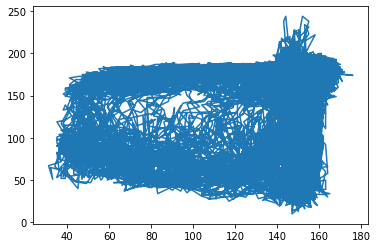

In [91]:
plt.plot(X[1],X[0])

In [201]:
X.shape , X.dtype

((360, 50176), dtype('uint8'))

In [194]:
mean = np.mean(X)

In [195]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [196]:
Scaled_X =  scaler.transform(X)

In [203]:
Scaled_X= Scaled_X.astype(np.uint8)

In [208]:
Scaled_X.T.dtype

dtype('uint8')

In [210]:
Scaled_X

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [213]:
co_var = np.cov(Scaled_X.T)

MemoryError: Unable to allocate 18.8 GiB for an array with shape (50176, 50176) and data type float64

In [147]:
co_var, co_var.shape

(array([[ 1.52308654e-01,  4.03411328e-02,  8.44867891e-04, ...,
         -3.36607369e-02,  6.05357958e-03, -1.02764911e-02],
        [ 4.03411328e-02,  6.74653548e-01,  1.33455263e-01, ...,
         -2.66822126e-01,  1.92376087e-01,  4.49439152e-02],
        [ 8.44867891e-04,  1.33455263e-01,  1.04635754e+00, ...,
         -1.79884128e-01,  1.34065031e-01,  1.76718429e-01],
        ...,
        [-3.36607369e-02, -2.66822126e-01, -1.79884128e-01, ...,
          3.07806659e-01, -2.53251704e-01, -6.87438910e-02],
        [ 6.05357958e-03,  1.92376087e-01,  1.34065031e-01, ...,
         -2.53251704e-01,  1.04689521e+00,  2.73585489e-02],
        [-1.02764911e-02,  4.49439152e-02,  1.76718429e-01, ...,
         -6.87438910e-02,  2.73585489e-02,  3.91767668e-01]]),
 (360, 360))

In [148]:
e_values, e_vectors = np.linalg.eig(co_var)

In [149]:
e_values, e_vectors

(array([6.23380679e+01, 1.92861894e+01, 1.49392884e+01, 1.33068405e+01,
        9.22838949e+00, 7.64711735e+00, 6.05386744e+00, 5.36889999e+00,
        4.35722340e+00, 3.00507718e+00, 2.80986089e+00, 2.43616784e+00,
        2.22699592e+00, 1.89985775e+00, 1.91898597e+00, 1.65448575e+00,
        1.34354472e+00, 1.27383761e+00, 1.22055015e+00, 1.06586512e+00,
        1.04072532e+00, 9.34851428e-01, 9.43391923e-01, 8.24114999e-01,
        7.70877383e-01, 7.09841261e-01, 6.79928605e-01, 6.50880402e-01,
        6.19176561e-01, 5.89259564e-01, 5.62590664e-01, 5.48200877e-01,
        5.33609256e-01, 5.21025412e-01, 5.06515253e-01, 4.90873534e-01,
        4.83611903e-01, 4.66339288e-01, 4.39742923e-01, 4.33859113e-01,
        3.96763695e-01, 3.93585762e-01, 3.75097109e-01, 3.62731820e-01,
        3.53627705e-01, 3.44160099e-01, 3.25667204e-01, 3.22488794e-01,
        3.12773973e-01, 3.10663736e-01, 2.99981134e-01, 2.96658316e-01,
        2.88387428e-01, 2.83849223e-01, 2.77807195e-01, 2.744500

In [163]:
proportion_of_variance = np.round(e_values/sum(e_values) *100)

In [164]:
proportion_of_variance

array([31., 10.,  8.,  7.,  5.,  4.,  3.,  3.,  2.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [183]:
Y = np.dot(e_vectors,X) 

In [184]:
Y.shape

(360, 50176)

In [190]:
pd.DataFrame(Y)

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,-151.165239,-149.268224,-158.719898,-155.312357,-159.478969,-164.751965,-169.613870,-168.912551,-166.481655,-167.971178,...,-152.787647,-154.053482,-156.835107,-161.318765,-162.509201,-168.804356,-168.468389,-172.662942,-176.898754,-177.839690
1,127.895673,133.185046,131.066643,135.166245,137.841026,136.984959,142.031499,141.886601,135.388440,137.857748,...,104.486975,105.567711,104.972333,97.308825,96.945285,102.780885,106.258953,99.926414,93.477265,96.782283
2,164.448581,160.818169,154.179507,148.607445,153.817780,152.321772,147.213709,143.240739,153.658573,152.921148,...,127.156406,134.831263,130.040511,122.300628,131.201998,133.940961,135.768161,130.829181,128.812701,131.548603
3,-305.863103,-303.368083,-304.609991,-306.968856,-308.892465,-310.449831,-316.258947,-325.320869,-324.479613,-327.016440,...,-341.938271,-333.222208,-331.310936,-331.370401,-329.672126,-325.429519,-323.289481,-318.069557,-313.877798,-307.406790
4,184.828506,187.569484,187.123159,175.979567,187.757741,188.821262,184.958539,186.295322,195.952761,206.027560,...,191.861056,199.006774,199.290750,198.783068,199.989796,202.267173,199.520265,197.561144,197.201881,202.981720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,55.071560,58.755042,52.595350,55.061235,53.185914,59.025409,53.935396,55.748543,58.189173,58.017215,...,27.925206,25.847037,28.382425,22.256312,25.721464,25.793727,19.837683,21.404093,28.577490,27.699277
356,36.143498,34.272848,36.503726,35.721754,35.337418,37.480511,37.036948,34.025025,39.770415,36.306463,...,38.379984,31.479523,31.352138,28.869456,35.247198,27.873862,15.324655,24.381497,23.754488,28.036422
357,-274.013530,-285.706160,-287.499716,-290.991726,-285.620756,-278.319221,-278.277202,-278.570176,-282.252933,-277.899676,...,-290.544000,-289.627473,-293.289693,-296.754569,-295.487508,-288.593992,-289.925335,-290.163236,-294.212770,-295.944401
358,289.868889,291.282359,293.880340,294.066123,296.259915,297.771453,296.987039,298.244539,301.902763,297.392864,...,290.931789,289.499498,288.301637,286.756702,284.233729,278.973839,279.493456,279.525292,277.007279,274.380172


In [186]:
color_mapping = {0: 'blue', 1: 'green'}
colors = [color_mapping[t] for t in new_df['Target']]

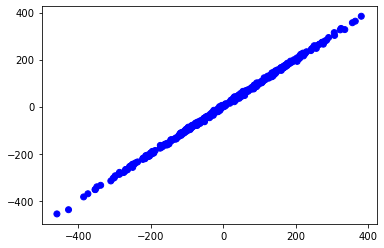

In [188]:
plt.scatter(Y[:,1],Y[:,2], c= colors)

## using the standard library:

In [133]:

from sklearn.decomposition import PCA
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_X)
Y_library = principal.transform(Scaled_X)

In [134]:
Y_library

array([[-2.4481383 ,  1.24260922,  0.83387948],
       [-2.46126772,  1.1890759 ,  0.99407666],
       [-2.72808804,  0.72323987,  0.62274826],
       ...,
       [ 2.04537279,  1.02453903, -0.19894938],
       [ 2.03725329,  0.71496029,  0.14549874],
       [ 1.95036613,  0.73175336,  0.09750224]])

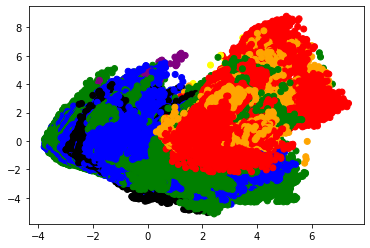

In [137]:
plt.scatter(Y_library.T[0],Y_library.T[1], c= colors)

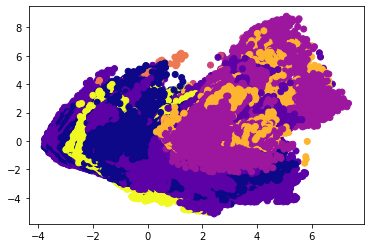

In [139]:
plt.scatter(x[:,0],x[:,1],c=new_df['Cover_Type'],cmap='plasma')